In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
# Menampilkan data sebelum pembersihan
print("Data Sebelum Pembersihan:")
print("Head Data:")
print(df.head())

Data Sebelum Pembersihan:
Head Data:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [ ]:
print("\nJumlah Nilai Null:")
print(df.isnull().sum())
# Menyimpan informasi jumlah null, duplikat, dan total data SEBELUM pembersihan
null_before = df.isnull().sum().sum()
duplicates_before = df.duplicated().sum()
rows_before = df.shape[0]
data_total_before = rows_before + duplicates_before
# Menangani nilai null (ganti dengan median jika ada)
if df.isnull().sum().any():
    df.fillna(df.median(), inplace=True)


Jumlah Nilai Null:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
print("\nDeskripsi Statistik:")
print(df.describe())
# Menangani duplikat
df = df.drop_duplicates()
# Menyimpan informasi jumlah null, duplikat, dan total data SESUDAH pembersihan
null_after = df.isnull().sum().sum()
duplicates_after = df.duplicated().sum()
rows_after = df.shape[0]
data_total_after = rows_after + duplicates_after


Deskripsi Statistik:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%        

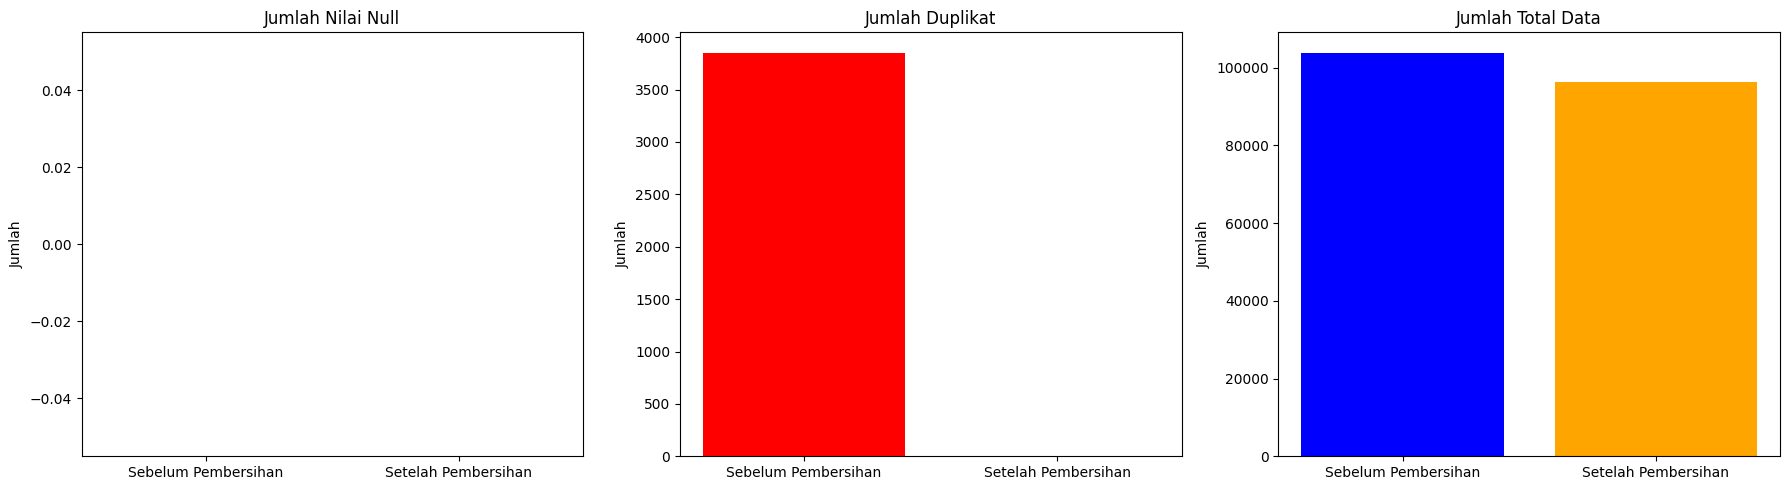

=== Ringkasan Data ===
Jumlah Baris Sebelum Pembersihan: 100000
Jumlah Baris Setelah Pembersihan: 96146
Jumlah Total Data Sebelum Pembersihan: 103854
Jumlah Total Data Setelah Pembersihan: 96146


In [ ]:
# Menampilkan Grafik Perbandingan
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Grafik 1: Jumlah Nilai Null Sebelum dan Sesudah
axes[0].bar(['Sebelum Pembersihan', 'Setelah Pembersihan'], [null_before, null_after], color=['red', 'green'])
axes[0].set_title('Jumlah Nilai Null')
axes[0].set_ylabel('Jumlah')

# Grafik 2: Jumlah Duplikat Sebelum dan Sesudah
axes[1].bar(['Sebelum Pembersihan', 'Setelah Pembersihan'], [duplicates_before, duplicates_after], color=['red', 'green'])
axes[1].set_title('Jumlah Duplikat')
axes[1].set_ylabel('Jumlah')

# Grafik 3: Jumlah Total Data Sebelum dan Sesudah
axes[2].bar(['Sebelum Pembersihan', 'Setelah Pembersihan'], [data_total_before, data_total_after], color=['blue', 'orange'])
axes[2].set_title('Jumlah Total Data')
axes[2].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

# Ringkasan Baris Sebelum dan Sesudah Pembersihan
print("=== Ringkasan Data ===")
print(f"Jumlah Baris Sebelum Pembersihan: {rows_before}")
print(f"Jumlah Baris Setelah Pembersihan: {rows_after}")
print(f"Jumlah Total Data Sebelum Pembersihan: {data_total_before}")
print(f"Jumlah Total Data Setelah Pembersihan: {data_total_after}")

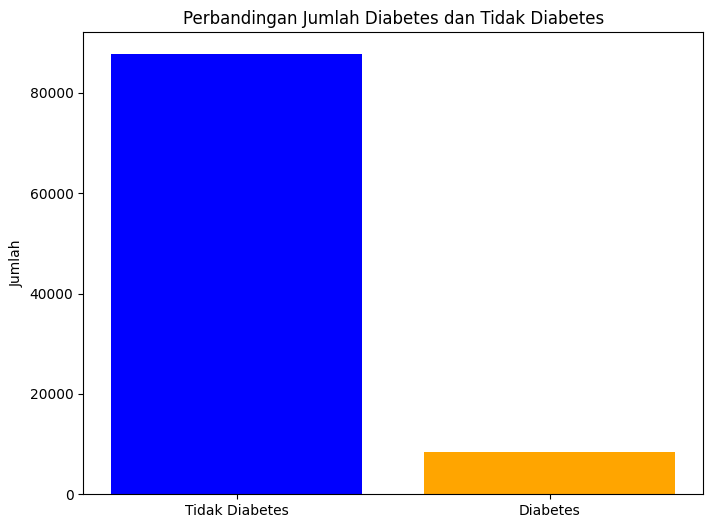

In [ ]:
# Membuat Grafik Perbandingan Diabetes dan Tidak Diabetes
diabetes_counts = df['diabetes'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(['Tidak Diabetes', 'Diabetes'], [diabetes_counts[0], diabetes_counts[1]], color=['blue', 'orange'])
plt.title('Perbandingan Jumlah Diabetes dan Tidak Diabetes')
plt.ylabel('Jumlah')
plt.show()


Distribusi Data Sebelum SMOTE-Tomek:
Counter({0: 87664, 1: 8482})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.vali


Distribusi Data Setelah SMOTE-Tomek:
Counter({0: 87269, 1: 87269})


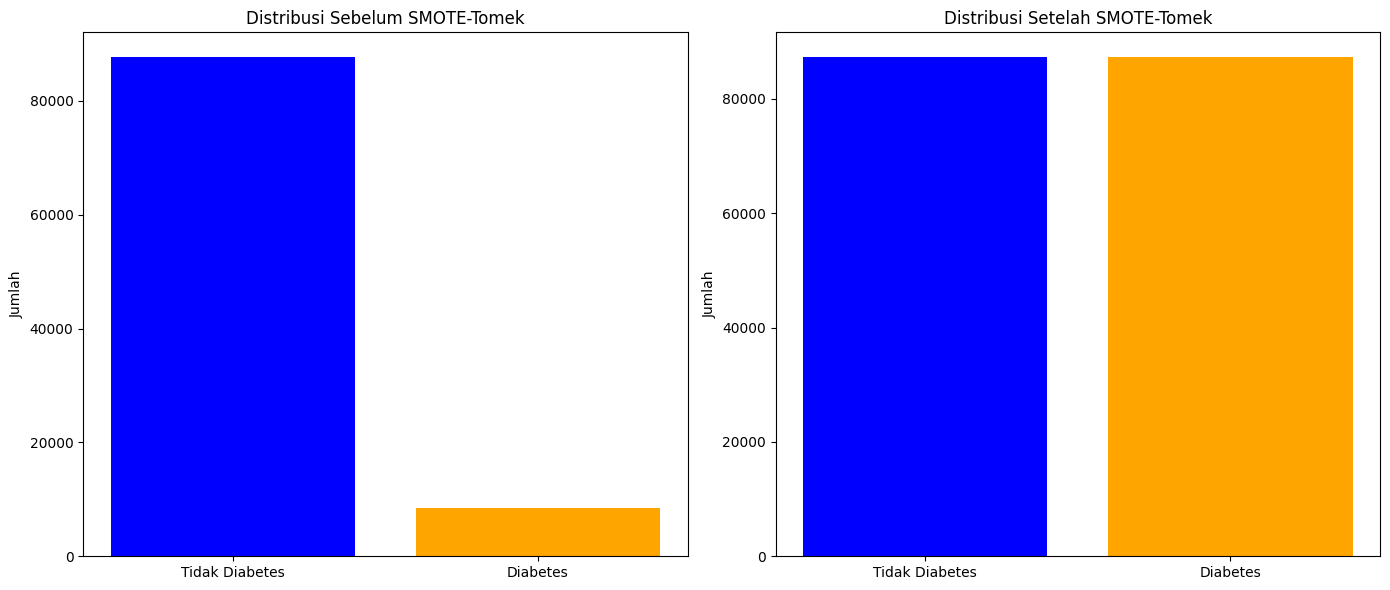

=== Ringkasan SMOTE-Tomek ===
Jumlah Data Sebelum SMOTE-Tomek: 96146
Jumlah Data Setelah SMOTE-Tomek: 174538


In [ ]:
# ====== SMOTE-Tomek untuk Menyeimbangkan Data ======
# Mengambil fitur (X) dan target (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Label Encoding untuk kolom kategorikal
label_encoder = LabelEncoder()

# Encode kolom 'gender' dan 'smoking_history'
X['gender'] = label_encoder.fit_transform(X['gender'])
X['smoking_history'] = label_encoder.fit_transform(X['smoking_history'])

# Menampilkan distribusi sebelum SMOTE-Tomek
print("\nDistribusi Data Sebelum SMOTE-Tomek:")
print(Counter(y))

# Melakukan SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X, y)

# Menggabungkan kembali data hasil SMOTE-Tomek
df_resampled = pd.concat([pd.DataFrame(X_res, columns=X.columns),
                          pd.DataFrame(y_res, columns=['diabetes'])], axis=1)

# Menampilkan distribusi setelah SMOTE-Tomek
print("\nDistribusi Data Setelah SMOTE-Tomek:")
print(Counter(y_res))

# ====== Visualisasi Sebelum dan Sesudah SMOTE-Tomek ======
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sebelum SMOTE-Tomek
axes[0].bar(['Tidak Diabetes', 'Diabetes'], [diabetes_counts[0], diabetes_counts[1]], color=['blue', 'orange'])
axes[0].set_title('Distribusi Sebelum SMOTE-Tomek')
axes[0].set_ylabel('Jumlah')

# Setelah SMOTE-Tomek
diabetes_counts_resampled = Counter(y_res)
axes[1].bar(['Tidak Diabetes', 'Diabetes'],
            [diabetes_counts_resampled[0], diabetes_counts_resampled[1]],
            color=['blue', 'orange'])
axes[1].set_title('Distribusi Setelah SMOTE-Tomek')
axes[1].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

# Ringkasan Akhir
print("=== Ringkasan SMOTE-Tomek ===")
print(f"Jumlah Data Sebelum SMOTE-Tomek: {rows_after}")
print(f"Jumlah Data Setelah SMOTE-Tomek: {len(y_res)}")



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17532
           1       0.98      0.97      0.98     17376

    accuracy                           0.98     34908
   macro avg       0.98      0.98      0.98     34908
weighted avg       0.98      0.98      0.98     34908



<Figure size 600x600 with 0 Axes>

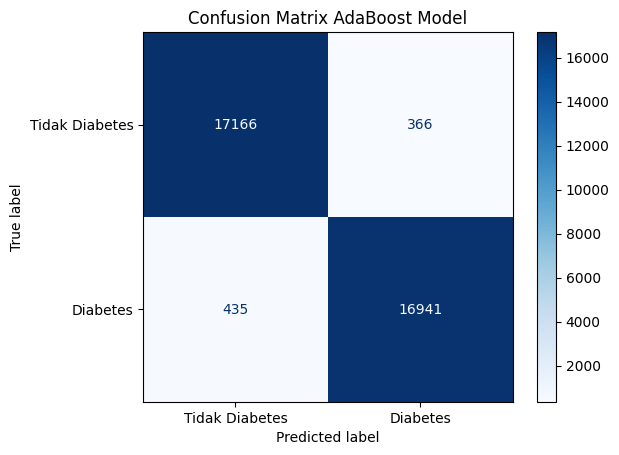


=== Resource Usage ===
Time Elapsed: 386.50 seconds
RAM Used: 2676.15 MB


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import psutil
import time

# ====== Split Data untuk Training dan Testing ======
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Monitor RAM usage before training
process = psutil.Process()
initial_ram = process.memory_info().rss / (1024 * 1024)  # in MB

# Start timer
start_time = time.time()

# ====== Training Model Boosting ======
# Base estimator for AdaBoost
base_estimator = RandomForestClassifier(random_state=42)

# AdaBoost Classifier
boosting_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)

# End timer
end_time = time.time()

# Monitor RAM usage after training
final_ram = process.memory_info().rss / (1024 * 1024)  # in MB

# Calculate time elapsed and RAM usage
time_elapsed = end_time - start_time
ram_used = final_ram - initial_ram

# Prediksi pada data test
y_pred = boosting_model.predict(X_test)

# ====== Evaluasi Model ======
# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Tidak Diabetes', 'Diabetes'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix AdaBoost Model')
plt.show()

# ====== Print Resource Usage ======
print(f"\n=== Resource Usage ===")
print(f"Time Elapsed: {time_elapsed:.2f} seconds")
print(f"RAM Used: {ram_used:.2f} MB")



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17532
           1       0.97      0.97      0.97     17376

    accuracy                           0.97     34908
   macro avg       0.97      0.97      0.97     34908
weighted avg       0.97      0.97      0.97     34908



<Figure size 600x600 with 0 Axes>

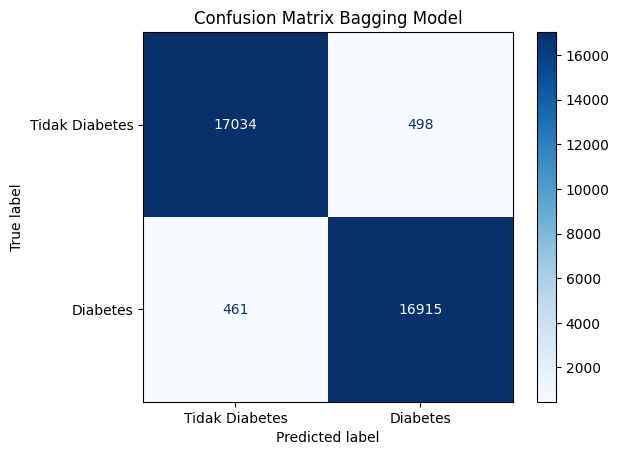


=== Resource Usage ===
Time Elapsed: 466.21 seconds
RAM Used: 3887.77 MB


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import psutil
import time

# ====== Split Data untuk Training dan Testing ======
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Monitor RAM usage before training
process = psutil.Process()
initial_ram = process.memory_info().rss / (1024 * 1024)  # in MB

# Start timer
start_time = time.time()

# ====== Training Model Bagging ======
# Base estimator for Bagging
base_estimator = RandomForestClassifier(random_state=42)

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)  # Bagging Model
bagging_model.fit(X_train, y_train)

# End timer
end_time = time.time()

# Monitor RAM usage after training
final_ram = process.memory_info().rss / (1024 * 1024)  # in MB

# Calculate time elapsed and RAM usage
time_elapsed = end_time - start_time
ram_used = final_ram - initial_ram

# Prediksi pada data test
y_pred = bagging_model.predict(X_test)

# ====== Evaluasi Model ======
# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Tidak Diabetes', 'Diabetes'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix Bagging Model')
plt.show()

# ====== Print Resource Usage ======
print(f"\n=== Resource Usage ===")
print(f"Time Elapsed: {time_elapsed:.2f} seconds")
print(f"RAM Used: {ram_used:.2f} MB")



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     17532
           1       0.98      0.95      0.96     17376

    accuracy                           0.97     34908
   macro avg       0.97      0.97      0.97     34908
weighted avg       0.97      0.97      0.97     34908



<Figure size 600x600 with 0 Axes>

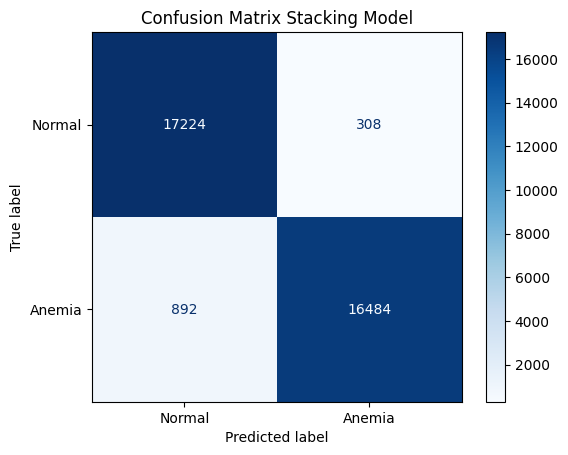

In [ ]:
from sklearn.ensemble import StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Base estimators
base_estimators = [
    ('boosting', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=3, random_state=42),  # Base estimator ringan
        n_estimators=50,  # Kurangi jumlah estimator
        random_state=42
    )),
    ('bagging', BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=3, random_state=42),  # Base estimator ringan
        n_estimators=50,  # Kurangi jumlah estimator
        n_jobs=-1,  # Paralelisme
        random_state=42
    ))
]

# Meta-model
meta_model = LogisticRegression(max_iter=500, random_state=42)

# ====== Stacking Model ======
stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=meta_model, n_jobs=-1)

# Training the Stacking Model
stacking_model.fit(X_train, y_train)

# Prediction on test data
y_pred = stacking_model.predict(X_test)

# ====== Evaluasi Model ======
# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anemia'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix Stacking Model')
plt.show()


In [ ]:
# ====== Split Data untuk Training dan Testing ======
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# ====== Training Model XGBoost ======
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = model.predict(X_test)

# ====== Evaluasi Model ======
# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Tidak Diabetes', 'Diabetes'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix XGBoost')
plt.show()

In [ ]:
# ====== Split Data untuk Training dan Testing ======
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# ====== Training Model Gradient Boosting ======
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = model.predict(X_test)

# ====== Evaluasi Model ======
# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Tidak Diabetes', 'Diabetes'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix Gradient Boosting')
plt.show()


In [ ]:
# ====== Split Data untuk Training dan Testing ======
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# ====== Training Model Random Forest ======
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = model.predict(X_test)

# ====== Evaluasi Model ======
# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Tidak Diabetes', 'Diabetes'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix Random Forest')
plt.show()



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17532
           1       0.99      0.97      0.98     17376

    accuracy                           0.98     34908
   macro avg       0.98      0.98      0.98     34908
weighted avg       0.98      0.98      0.98     34908



<Figure size 600x600 with 0 Axes>

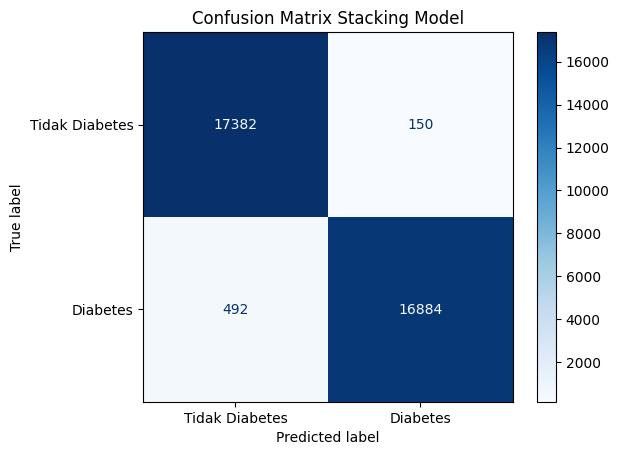


=== Resource Usage ===
Time Elapsed: 189.23 seconds
RAM Used: 155.26 MB


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import xgboost as xgb
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import psutil
import time

# Wrapper untuk XGBClassifier
class WrappedXGBClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, **kwargs):
        self.model = xgb.XGBClassifier(**kwargs)

    def fit(self, X, y):
        self.model.fit(X, y)
        # Tambahkan atribut classes_ agar kompatibel dengan Scikit-learn
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

# ====== Split Data untuk Training dan Testing ======
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Monitor RAM usage before training
process = psutil.Process()
initial_ram = process.memory_info().rss / (1024 * 1024)  # in MB

# Start timer
start_time = time.time()

# Base models
base_learners = [
    ('xgb', WrappedXGBClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
]

# Meta model
meta_model = RandomForestClassifier(random_state=42)

# Stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model, cv=5)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# End timer
end_time = time.time()

# Monitor RAM usage after training
final_ram = process.memory_info().rss / (1024 * 1024)  # in MB

# Calculate time elapsed and RAM usage
time_elapsed = end_time - start_time
ram_used = final_ram - initial_ram

# Predict on test data
y_pred = stacking_model.predict(X_test)

# ====== Evaluasi Model ======
# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Tidak Diabetes', 'Diabetes'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix Stacking Model')
plt.show()

# ====== Print Resource Usage ======
print(f"\n=== Resource Usage ===")
print(f"Time Elapsed: {time_elapsed:.2f} seconds")
print(f"RAM Used: {ram_used:.2f} MB")



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17358
           1       0.99      0.97      0.98     17550

    accuracy                           0.98     34908
   macro avg       0.98      0.98      0.98     34908
weighted avg       0.98      0.98      0.98     34908



<Figure size 600x600 with 0 Axes>

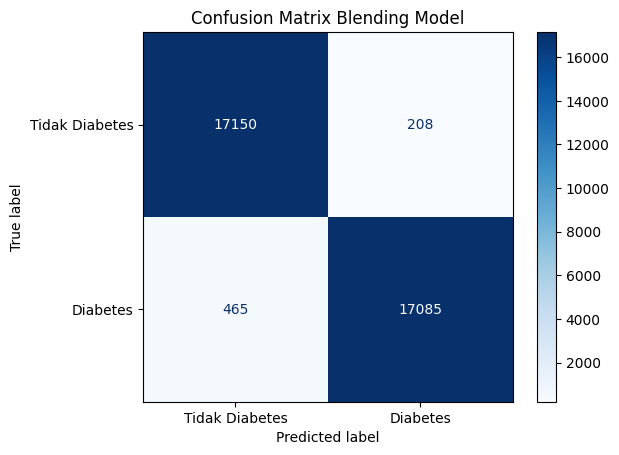


=== Resource Usage ===
Time Elapsed: 37.20 seconds
RAM Used: 87.66 MB


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import psutil
import time

# Wrapper untuk XGBClassifier
class WrappedXGBClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, **kwargs):
        self.model = xgb.XGBClassifier(**kwargs)

    def fit(self, X, y):
        self.model.fit(X, y)
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

# ====== Split Data untuk Training, Validation, dan Testing ======
X_train, X_temp, y_train, y_temp = train_test_split(X_res, y_res, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Monitor RAM usage before training
process = psutil.Process()
initial_ram = process.memory_info().rss / (1024 * 1024)  # in MB

# Start timer
start_time = time.time()

# Base models
base_learners = {
    'xgb': WrappedXGBClassifier(random_state=42),
    'gb': GradientBoostingClassifier(random_state=42),
    'rf': RandomForestClassifier(random_state=42)
}

# Train base models
predictions_val = []
for name, model in base_learners.items():
    model.fit(X_train, y_train)
    pred_proba = model.predict_proba(X_val)
    predictions_val.append(pred_proba)

# Combine predictions from base models
stacked_val = np.hstack(predictions_val)

# Meta model (Random Forest)
meta_model = RandomForestClassifier(random_state=42)
meta_model.fit(stacked_val, y_val)

# End timer
end_time = time.time()

# Monitor RAM usage after training
final_ram = process.memory_info().rss / (1024 * 1024)  # in MB

# Calculate time elapsed and RAM usage
time_elapsed = end_time - start_time
ram_used = final_ram - initial_ram

# Predict on test data using base models
predictions_test = []
for name, model in base_learners.items():
    pred_proba = model.predict_proba(X_test)
    predictions_test.append(pred_proba)

# Combine predictions from base models for test data
stacked_test = np.hstack(predictions_test)

# Predict final output using meta model
y_pred = meta_model.predict(stacked_test)

# ====== Evaluasi Model ======
# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Tidak Diabetes', 'Diabetes'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix Blending Model')
plt.show()

# ====== Print Resource Usage ======
print(f"\n=== Resource Usage ===")
print(f"Time Elapsed: {time_elapsed:.2f} seconds")
print(f"RAM Used: {ram_used:.2f} MB")
